# Local Regularization of 4He System

We've tried a few different nonlocal implementations, maybe we'll have more luck with the local scheme...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import helium4plusplus as he4

In [3]:
ELL = 0
R_MAX = he4.BETA6/2
R_MIN = he4.BETA6/8
N1 = 6

nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)

gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [4]:
index = 0
R = Rs[index]

sys = he4.LocalHelium4System(R, ELL, N1)

In [22]:
guess = 135
sys.bound_state_spectrum(guess, 0)

array([-0.00138903])

In [23]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 50)
KCD = -1/he4.A0 + he4.R0/2*momenta**2

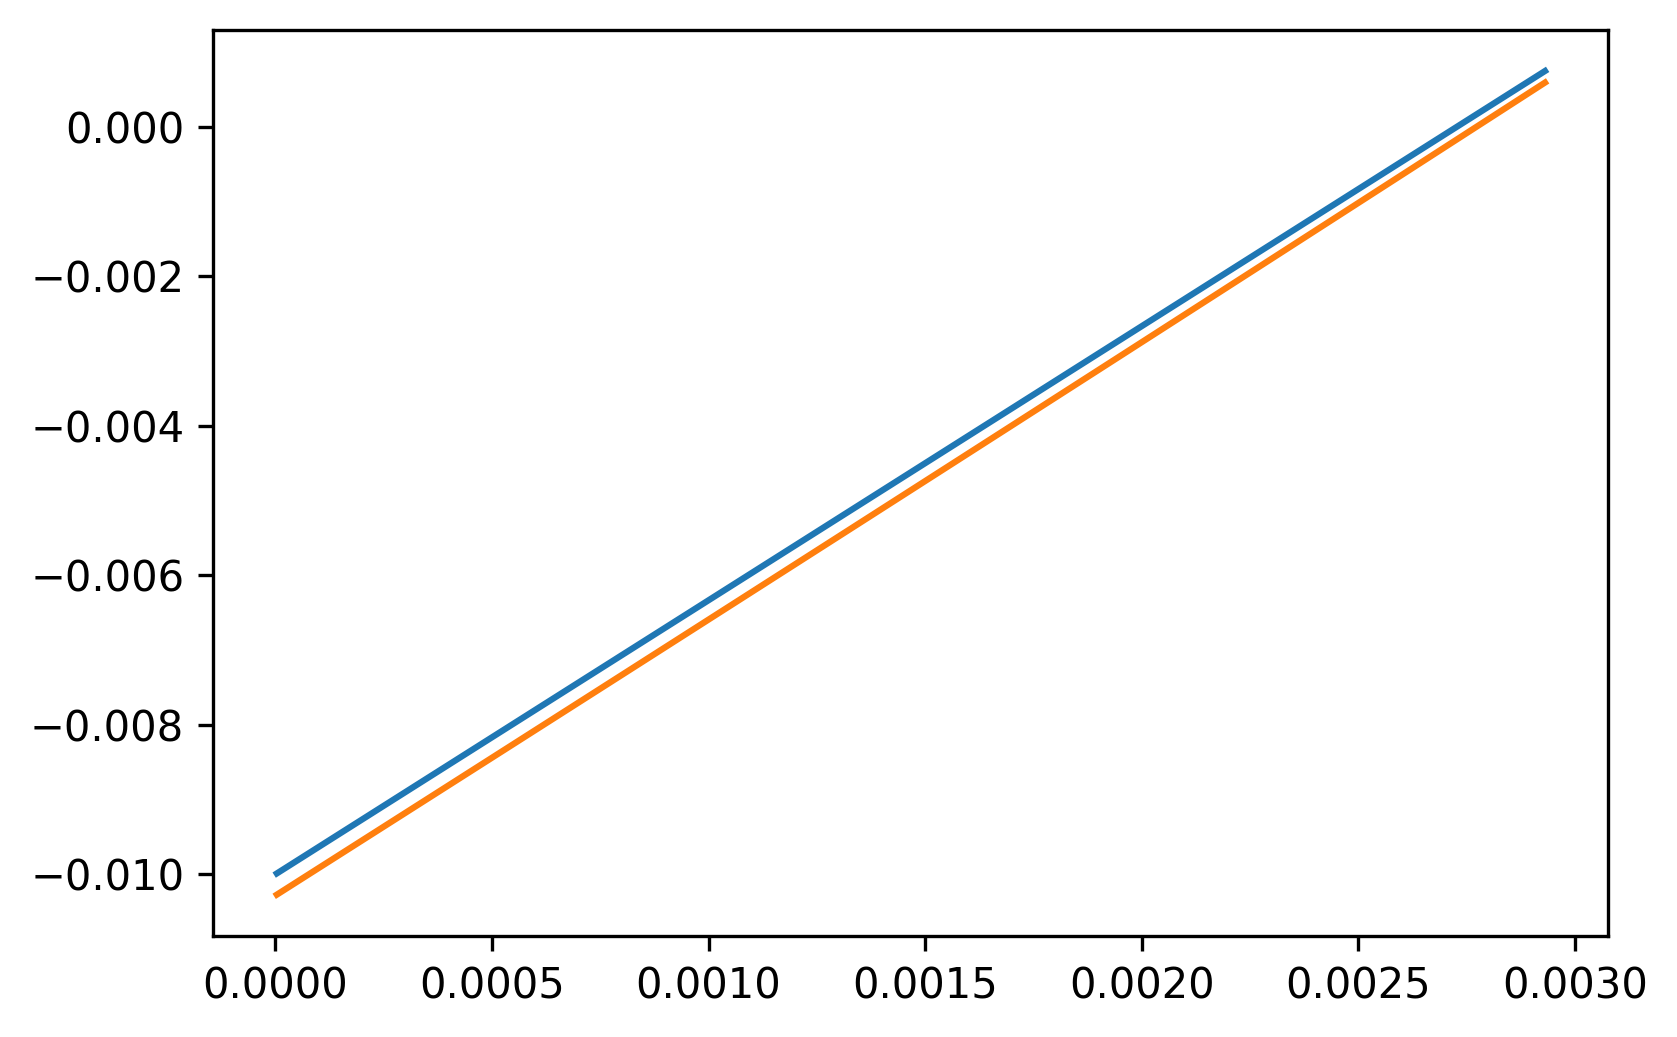

In [25]:
fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

ax.plot(momenta**2, KCD)
ax.plot(momenta**2, sys.kcotd_gen_fast(momenta, guess, 0));

In [29]:
# First, we'll go through and minimize the chi^2. Then we'll go back through and
# use the chi^2 result as a guess to tune the scattering length precisely.

def chi_squared(sys, g):
    kcd = sys.kcotd_gen_fast(momenta, g, 0)
    return np.sum(((KCD - kcd)/KCD)**2)

In [30]:
from scipy import optimize

In [31]:
for i in range(nR):
    R = Rs[i]
    sys = he4.LocalHelium4System(R, ELL, N1)
    
    result = optimize.minimize(lambda x: chi_squared(sys, x), guess)
    glo = result.x[0]
    gs[i] = glo
    guess = glo
    print(f'{i}  {R:.4f}  {glo:.4e}')

0  2.7706  1.3512e+02
1  2.6108  3.2453e+02
2  2.4684  9.2236e+02
3  2.3407  3.3849e+03
4  2.2256  1.7374e+04
5  2.1213  1.7374e+04
6  2.0263  1.7402e+04
7  1.9394  1.7404e+04
8  1.8597  1.7404e+04
9  1.7863  1.7705e+04
10  1.7185  1.7710e+04
11  1.6556  4.1622e+03
12  1.5972  1.0317e+04
13  1.5427  1.0317e+04
14  1.4919  1.0318e+04
15  1.4443  3.9596e+05
16  1.3996  3.9596e+05
17  1.3576  3.9596e+05
18  1.3181  3.9596e+05
19  1.2808  3.9596e+05
20  1.2455  3.9596e+05
21  1.2121  3.9596e+05
22  1.1805  3.9596e+05
23  1.1505  3.9596e+05
24  1.1220  3.9596e+05
25  1.0948  3.9597e+05
26  1.0690  3.9597e+05
27  1.0443  3.9597e+05
28  1.0208  3.9597e+05
29  0.9982  3.9600e+05
30  0.9767  3.9600e+05
31  0.9561  3.9600e+05
32  0.9363  3.9600e+05
33  0.9173  3.9599e+05
34  0.8991  3.9599e+05
35  0.8816  3.9599e+05
36  0.8647  3.9807e+05
37  0.8485  3.9807e+05
38  0.8329  3.9807e+05
39  0.8178  3.9808e+05
40  0.8033  3.9808e+05
41  0.7893  3.9811e+05
42  0.7758  3.9811e+05
43  0.7627  3.9811e+0

In [32]:
gs

array([1.35120024e+02, 3.24534513e+02, 9.22355190e+02, 3.38486397e+03,
       1.73740581e+04, 1.73740581e+04, 1.74017958e+04, 1.74037058e+04,
       1.74037058e+04, 1.77052394e+04, 1.77101845e+04, 4.16223803e+03,
       1.03169859e+04, 1.03169859e+04, 1.03179959e+04, 3.95958779e+05,
       3.95958779e+05, 3.95959538e+05, 3.95959538e+05, 3.95960548e+05,
       3.95961653e+05, 3.95960644e+05, 3.95960644e+05, 3.95961664e+05,
       3.95961664e+05, 3.95966714e+05, 3.95971764e+05, 3.95971764e+05,
       3.95971764e+05, 3.95995052e+05, 3.95996062e+05, 3.95997072e+05,
       3.95998082e+05, 3.95991625e+05, 3.95991625e+05, 3.95992156e+05,
       3.98069229e+05, 3.98073983e+05, 3.98072973e+05, 3.98078023e+05,
       3.98079033e+05, 3.98112275e+05, 3.98113285e+05, 3.98108235e+05,
       3.98108235e+05, 3.98108235e+05, 3.98108566e+05, 3.98108566e+05,
       3.53238460e+05, 3.53251702e+05])